# Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_test, Y_test, test_size=0.4, random_state=2)


#X_train = X_scaled[0:75]
#Y_train = Y[0:75]
#X_val  = X_scaled[75:105]
#Y_val  = Y[75:105]
#X_test  = X_scaled[105:150]
#Y_test = Y[105:150]


#X_train = np.concatenate((X_scaled[0:30],X_scaled[60:150]),axis=0)


n_features = X.shape[1]
n_classes = Y.shape[1]

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(75, 4)
(45, 4)
(30, 4)


In [ ]:
print(feature_names[2])

petal length (cm)


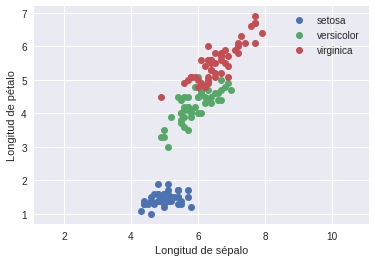

In [5]:
I = 2
J = 0

# Visualize the data sets
# plt.figure(figsize=(16, 6))
# plt.subplot(1, 2, 1)
# for target, target_name in enumerate(names):
#    X_plot = X[y == target]
#    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
#plt.xlabel(feature_names[0])
#plt.ylabel(feature_names[1])
#plt.axis('equal')
#plt.legend();

#plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, J], X_plot[:, I], linestyle='none', marker='o', label=target_name)
plt.xlabel('Longitud de sépalo')#feature_names[J])
plt.ylabel('Longitud de pétalo') #feature_names[I])
plt.axis('equal')
plt.legend()
plt.savefig('iris.eps');

In [ ]:
print(X_train[0][2:4],Y_train[0])

[-1.22655167 -1.3154443 ] [1. 0. 0.]


In [ ]:
from time import time

def hebb(w1,w2,w3,Xp,yp,s):
	t1 = time()
	for i in range(len(yp)):
		if yp[i][0] == 1:
			w1[-int(Xp[i][I]*s)+12][int(Xp[i][J]*s)+12] += alpha			
		elif yp[i][1] == 1:
			w2[-int(Xp[i][I]*s)+12][int(Xp[i][J]*s)+12] += alpha
		else:
			w3[-int(Xp[i][I]*s)+12][int(Xp[i][J]*s)+12] += alpha      

	t2 = time()
	return w1,w2,w3,t2-t1

In [ ]:
Dt = 0

In [ ]:
s = 10
alpha = 0.1

W1 = np.zeros((s*24,s*24))
W2 = np.zeros((s*24,s*24))
W3 = np.zeros((s*24,s*24))

W1,W2,W3,dt = hebb(W1,W2,W3,X_train,Y_train,s)

In [ ]:
# Evaluacion

def eval(Xp,Yp):

  N = len(Yp)
  suma = 0
  for i in range(N):
    a = W1[-int(Xp[i][I]*s)+12][int(Xp[i][J]*s)+12]
    b = W2[-int(Xp[i][I]*s)+12][int(Xp[i][J]*s)+12]
    c = W3[-int(Xp[i][I]*s)+12][int(Xp[i][J]*s)+12]

    if Yp[i][0] == 1:
      if a <= b or a <= c:
        suma += 1
    elif Yp[i][1] == 1:
      if b < a or b <= c:
        suma += 1
    elif Yp[i][2] == 1:
      if c < a or c < b:
        suma += 1
  
  #print("Metodo hebbiano")
  print("costo=",suma)
  print("Efectividad =",1-float(suma)/(N))

Dt += dt
print('s = ', s)
print("Training")
eval(X_train,Y_train)
print("Validation")
eval(X_val,Y_val)
print("Testing")
eval(X_test,Y_test)
print("Dt = ", dt)

s =  10
Training
costo= 0
Efectividad = 1.0
Validation
costo= 27
Efectividad = 0.4
Testing
costo= 14
Efectividad = 0.5333333333333333
Dt =  0.0005383491516113281


In [ ]:
Dt = 0.0003921985626220703 + 0.0004267692565917969 + 0.0003895759582519531
Dt += 0.0004112720489501953 + 0.0004553794860839844 + 0.0004496574401855469
Dt += 0.00041604042053222656 + 0.0035223960876464844 + 0.00036454200744628906
Dt += 0.00042057037353515625


0.0007248401641845703


In [ ]:
print(Dt/10)

0.0010404348373413085



s = 1

```
Training
costo= 8
Efectividad = 0.8933333333333333
Validation
costo= 3
Efectividad = 0.9333333333333333
Testing
costo= 3
Efectividad = 0.9
Dt =  0.0003921985626220703
```

s = 2

```
Training
costo= 4
Efectividad = 0.9466666666666667
Validation
costo= 2
Efectividad = 0.9555555555555556
Testing
costo= 1
Efectividad = 0.9666666666666667
Dt =  0.0004267692565917969
```


s = 3

```
Training
costo= 2
Efectividad = 0.9733333333333334
Validation
costo= 3
Efectividad = 0.9333333333333333
Testing
costo= 0
Efectividad = 1.0
Dt =  0.0003895759582519531
```

s = 4 

``` 
Training
costo= 1
Efectividad = 0.9866666666666667
Validation
costo= 3
Efectividad = 0.9333333333333333
Testing
costo= 1
Efectividad = 0.9666666666666667
Dt =  0.0004112720489501953
```

s = 5

``` 
Training
costo= 2
Efectividad = 0.9733333333333334
Validation
costo= 9
Efectividad = 0.8
Testing
costo= 2
Efectividad = 0.9333333333333333
Dt =  0.0004553794860839844
```

s = 6

``` 
Training
costo= 1
Efectividad = 0.9866666666666667
Validation
costo= 4
Efectividad = 0.9111111111111111
Testing
costo= 4
Efectividad = 0.8666666666666667
Dt =  0.0004496574401855469
```

s = 7

``` 
Training
costo= 1
Efectividad = 0.9866666666666667
Validation
costo= 6
Efectividad = 0.8666666666666667
Testing
costo= 4
Efectividad = 0.8666666666666667
Dt =  0.00041604042053222656
```

s = 8 

``` 
Training
costo= 1
Efectividad = 0.9866666666666667
Validation
costo= 9
Efectividad = 0.8
Testing
costo= 11
Efectividad = 0.6333333333333333
Dt =  0.0035223960876464844
```


s = 9

``` 
Training
costo= 1
Efectividad = 0.9866666666666667
Validation
costo= 11
Efectividad = 0.7555555555555555
Testing
costo= 12
Efectividad = 0.6
Dt =  0.00036454200744628906
```

s = 10

``` 
Training
costo= 1
Efectividad = 0.9866666666666667
Validation
costo= 11
Efectividad = 0.7555555555555555
Testing
costo= 12
Efectividad = 0.6
Dt =  0.00042057037353515625
```


In [6]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model



models = [create_custom_model(n_features, n_classes, 50, i, 'Modelo_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "Modelo_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________
Model: "Modelo_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                250       
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 3)    

In [7]:
from keras.callbacks import TensorBoard
from time import time

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    t1 = time()
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=15,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    t2 = time()
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Elapsed time:',t2-t1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    score2 = model.evaluate(X_train, Y_train, verbose=0)
    print('Train loss:', score2[0])
    print('Train accuracy:', score2[1])
    history_dict[model.name] = [history_callback, model]
    score3 = model.evaluate(X_val, Y_val, verbose=0)
    print('Val loss:', score3[0])
    print('Val accuracy:', score3[1])
    print("____________________________________________")    

Model name: Modelo_1
Elapsed time: 1.540376901626587
Test loss: 0.3009810447692871
Test accuracy: 0.8999999761581421
Train loss: 0.3439269959926605
Train accuracy: 0.8399999737739563
Val loss: 0.37444424629211426
Val accuracy: 0.8444444537162781
____________________________________________
Model name: Modelo_2
Elapsed time: 1.7802765369415283
Test loss: 0.17353922128677368
Test accuracy: 0.9666666388511658
Train loss: 0.1501399427652359
Train accuracy: 0.9733333587646484
Val loss: 0.2549203634262085
Val accuracy: 0.9111111164093018
____________________________________________
Model name: Modelo_3
Elapsed time: 1.8210175037384033
Test loss: 0.20989097654819489
Test accuracy: 0.9333333373069763
Train loss: 0.06548453867435455
Train accuracy: 0.9866666793823242
Val loss: 0.4419834017753601
Val accuracy: 0.8888888955116272
____________________________________________


Fold 1

```
Model name: Modelo_1
Elapsed time: 1.5819268226623535
Test loss: 0.268419086933136
Test accuracy: 0.9333333373069763
Train loss: 0.301923006772995
Train accuracy: 0.9066666960716248
Val loss: 0.33547404408454895
Val accuracy: 0.8666666746139526
____________________________________________
Model name: Modelo_2
Elapsed time: 1.1914377212524414
Test loss: 0.19759227335453033
Test accuracy: 0.9333333373069763
Train loss: 0.14800545573234558
Train accuracy: 0.9733333587646484
Val loss: 0.30254480242729187
Val accuracy: 0.8888888955116272
____________________________________________
Model name: Modelo_3
Elapsed time: 1.6446101665496826
Test loss: 0.18000291287899017
Test accuracy: 0.9333333373069763
Train loss: 0.061197832226753235
Train accuracy: 1.0
Val loss: 0.3502825200557709
Val accuracy: 0.9111111164093018
____________________________________________
```



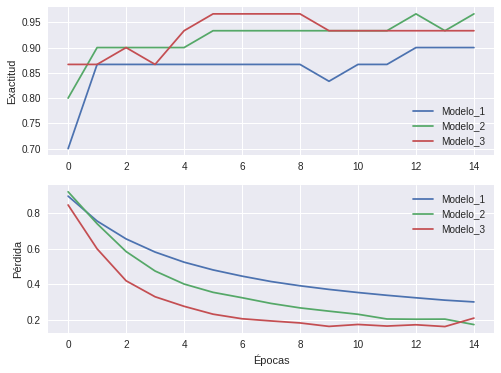

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('Exactitud')
ax2.set_ylabel('Pérdida')
ax2.set_xlabel('Épocas')
ax1.legend()
ax2.legend()
plt.savefig('accuraciesIris.eps');

In [9]:
import random
import keras

# Constants
mum = 9
M1 = 4
T1 = 3
k1 = 10




In [10]:
def geneticCode(V):
        model = Sequential()
        for v in V:
            model.add(Dense(v, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

        model.fit(X_train, Y_train, epochs=25)


        validation_loss, validation_acc = model.evaluate(X_train, Y_train)

        print('Validation accuracy:', validation_acc)

        return validation_acc

def geneticCodeE(V):
        model = Sequential()
        for v in V:
            model.add(Dense(v, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

        model.fit(X_train, Y_train, epochs=15)
        t_loss,t_acc = model.evaluate(X_train, Y_train)
        validation_loss, validation_acc = model.evaluate(X_val, Y_val)
        test_loss, test_acc = model.evaluate(X_test, Y_test)
        print(V)
        print('Training accuracy:',t_acc)
        print('Validation accuracy:', validation_acc)
        print('Test accuracy:', test_acc)
        return validation_acc


In [11]:
V = [50]

Nset = [V]

input_dim, output_dim = n_features, n_classes

ma = geneticCodeE(V)

maxis = [ma]

# Fision binaria

NsetAux = [V]
maxisAux= [ma]

L = []
MAXIS = []

r = False

Epoch 1/15
3/3 [==============================] - 0s 6ms/step - loss: 1.2718 - accuracy: 0.0267
Epoch 2/15
3/3 [==============================] - 0s 4ms/step - loss: 1.2233 - accuracy: 0.0800
Epoch 3/15
3/3 [==============================] - 0s 4ms/step - loss: 1.1811 - accuracy: 0.0933
Epoch 4/15
3/3 [==============================] - 0s 4ms/step - loss: 1.1406 - accuracy: 0.1200
Epoch 5/15
3/3 [==============================] - 0s 5ms/step - loss: 1.0987 - accuracy: 0.2933
Epoch 6/15
3/3 [==============================] - 0s 4ms/step - loss: 1.0611 - accuracy: 0.4000
Epoch 7/15
3/3 [==============================] - 0s 4ms/step - loss: 1.0248 - accuracy: 0.5200
Epoch 8/15
3/3 [==============================] - 0s 5ms/step - loss: 0.9898 - accuracy: 0.6933
Epoch 9/15
3/3 [==============================] - 0s 6ms/step - loss: 0.9555 - accuracy: 0.7067
Epoch 10/15
3/3 [==============================] - 0s 5ms/step - loss: 0.9238 - accuracy: 0.7467
Epoch 11/15
3/3 [======================

In [12]:
timeA = time()

for t in range(15): #15

        # Fision binaria

        print("___________________________")
        print("T=",t)

        # Depredacion
        l = len(Nset)
        #if l > 5: # PARAMETRO 5

        if t == M1:
                print("Depredacion")
                r = True
                maxiscopy = maxis[:]
                maxiscopy.sort(reverse=True)
                #maxiscopy = np.array(maxiscopy) + 0.0001*np.random.rand(len(maxiscopy))
                print(maxiscopy)
                print(mum) # PAREMETRO 2
                theta = maxiscopy[mum] # VERIFICAR
                print("theta=",theta)
                Nset2 = Nset[:]
                maxis2= maxis[:]
                h = 0
                for i in range(l):
                        if maxis[i] <= theta:
                                print(maxis[i])
                                print(maxis2[i-h])
                                del Nset2[i-h]
                                del maxis2[i-h]
                                h += 1
                Nset = Nset2[:]
                maxis= maxis2[:]
                NsetAux = Nset2[:]
                maxisAux = maxis2[:]
                l = len(Nset)
                L.append(l)

        print("__")
        print(Nset)
        print(maxis)
        for N in Nset: # Reproduccion
                #NsetAux.append(N)
                N1 = N[:]
                alea = random.random()
                if alea < 0.7: # Desicion alpha/beta
                        #alpha-mutacion
                        l = len(N)
                        elec = random.randrange(l)
                        N1[elec] += k1
                else:
                        N1.append(k1)

                # N1 es el hijo. N se divide en N y N1
                #NsetAux.append(N1)

                ban = True
                for i in range(len(NsetAux)): #NsetAux
                        if NsetAux[i] == N1:
                                ban = False
                                #print(NsetAux)
                                #print(maxisAux)
                                m1 = maxisAux[i]

                NsetAux.append(N1)

                if ban:
                        m1 = geneticCodeE(N1)
                maxisAux.append(m1)
        Nset  = NsetAux[:]
        maxis = maxisAux[:]
        maxis = np.array(maxis) + 0.0001*np.random.rand(len(maxis))
        maxis = list(maxis)
        print("Redes")
        print(Nset)
        print("Maximos")
        print(maxis)
        print
        print
        maxisAux = maxis[:]

        l = len(Nset)
        L.append(l)
        MAXIS.append(max(maxis))

        if r:
                M1 += T1
                r = False

timeB = time()

___________________________
T= 0
__
[[50]]
[0.7555555701255798]
Epoch 1/15
3/3 [==============================] - 0s 4ms/step - loss: 1.0874 - accuracy: 0.6133
Epoch 2/15
3/3 [==============================] - 0s 3ms/step - loss: 1.0548 - accuracy: 0.6400
Epoch 3/15
3/3 [==============================] - 0s 4ms/step - loss: 1.0226 - accuracy: 0.6533
Epoch 4/15
3/3 [==============================] - 0s 5ms/step - loss: 0.9947 - accuracy: 0.6667
Epoch 5/15
3/3 [==============================] - 0s 4ms/step - loss: 0.9686 - accuracy: 0.6400
Epoch 6/15
3/3 [==============================] - 0s 4ms/step - loss: 0.9440 - accuracy: 0.6533
Epoch 7/15
3/3 [==============================] - 0s 8ms/step - loss: 0.9211 - accuracy: 0.6800
Epoch 8/15
3/3 [==============================] - 0s 5ms/step - loss: 0.8993 - accuracy: 0.7867
Epoch 9/15
3/3 [==============================] - 0s 5ms/step - loss: 0.8777 - accuracy: 0.7867
Epoch 10/15
3/3 [==============================] - 0s 5ms/step - loss: 0

In [13]:
print(max(maxis))
for i in range(len(maxis)):
  if maxis[i] > 0.86:
    print(i,maxis[i],Nset[i])

0.889571100310389
0 0.889571100310389 [50, 10, 10, 10]
2 0.8893272633371904 [50, 10, 10, 10]
3 0.8894494471913263 [50, 10, 10, 10]
4 0.8669218091780606 [80, 10]
5 0.8670719365974762 [80, 10]
6 0.8669038962547823 [80, 10]
7 0.8669484374141121 [80, 10]
8 0.8668996284243754 [80, 10]
19 0.8669824981625212 [80, 10]


In [ ]:
V = [70, 10, 10, 10, 10, 10]

geneticCode(V)

Epoch 1/25
3/3 [==============================] - 1s 5ms/step - loss: 1.0956 - accuracy: 0.3067
Epoch 2/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0891 - accuracy: 0.3333
Epoch 3/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0826 - accuracy: 0.3333
Epoch 4/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0762 - accuracy: 0.3333
Epoch 5/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0697 - accuracy: 0.3333
Epoch 6/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0619 - accuracy: 0.3333
Epoch 7/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0527 - accuracy: 0.3333
Epoch 8/25
3/3 [==============================] - 0s 7ms/step - loss: 1.0443 - accuracy: 0.4000
Epoch 9/25
3/3 [==============================] - 0s 6ms/step - loss: 1.0341 - accuracy: 0.4133
Epoch 10/25
3/3 [==============================] - 0s 6ms/step - loss: 1.0234 - accuracy: 0.4267
Epoch 11/25
3/3 [======================

0.7866666913032532

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


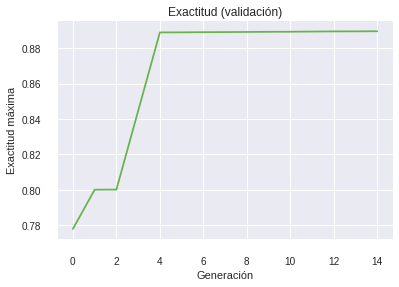

In [17]:
fig,ax = plt.subplots()

ax.plot(MAXIS, color = (0.4,0.7,0.3))
ax.set_title(u"Exactitud (validación)")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.set_ylim([0,100])
ax.set_xlabel('Generación')
ax.set_ylabel('Exactitud máxima')
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.legend()
plt.savefig('accuraciesG.png');
#plt.plot(MAXIS)
#plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


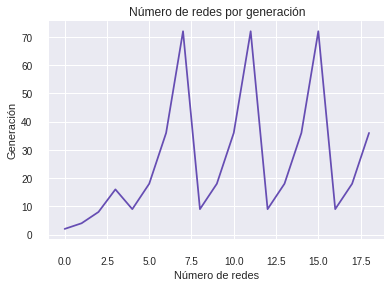

In [15]:
fig,ax = plt.subplots()
ax.plot(L, color = (0.4,0.3,0.7))
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.set_ylim([0,100])
ax.set_title(u"Número de redes por generación")
ax.set_xlabel('Número de redes')
ax.set_ylabel('Generación')
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('generaciones.png')
plt.show()